In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

>Read in master.csv generated in gap cleaning.ipynb

In [2]:
df = pd.read_csv('master.csv')
df.head()

,country,year,gdp_total_yearly_growth,human_development_index,unempolyment_rate_percent,population_total
0,Albania,1990,1.94,0.644,NaN,3290000
1,Albania,1991,-28.90,0.625,NaN,3280000
2,Albania,1992,-8.79,0.608,NaN,3250000
3,Albania,1993,7.38,0.611,NaN,3200000
4,Albania,1994,5.93,0.617,NaN,3150000


Change the year column dtype to datetime

In [3]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [4]:
df['year']

0      1990-01-01
1      1991-01-01
2      1992-01-01
3      1993-01-01
4      1994-01-01
          ...    
2923   2009-01-01
2924   2010-01-01
2925   2011-01-01
2926   2012-01-01
2927   2013-01-01
Name: year, Length: 2928, dtype: datetime64[ns]

## Exploratory Data Analysis:


In [5]:
df.year.min(), df.year.max()

(Timestamp('1990-01-01 00:00:00'), Timestamp('2013-01-01 00:00:00'))

### Lets see how each of the mean metrics has changed, world over, throughout our range of years. Which have increased or decreased?

In [6]:
df_grouped_by_year = df.drop(columns=['country'],
                             axis='columns').groupby('year').mean()
df_grouped_by_year

,gdp_total_yearly_growth,human_development_index,unempolyment_rate_percent,population_total
year,,,,
1990-01-01,1.281303,0.628224,0.008542,2.203788e+07
1991-01-01,-0.436102,0.630654,0.010643,2.236525e+07
1992-01-01,-1.663850,0.629613,0.018265,2.265771e+07
1993-01-01,-0.728144,0.635542,0.022157,2.296425e+07
1994-01-01,1.522656,0.639271,0.022915,2.326097e+07
1995-01-01,3.923721,0.643909,0.021241,2.355634e+07
1996-01-01,4.679241,0.649664,0.020876,2.386166e+07
1997-01-01,5.414467,0.653000,0.020293,2.416443e+07
1998-01-01,3.465530,0.660964,0.021272,2.446014e+07


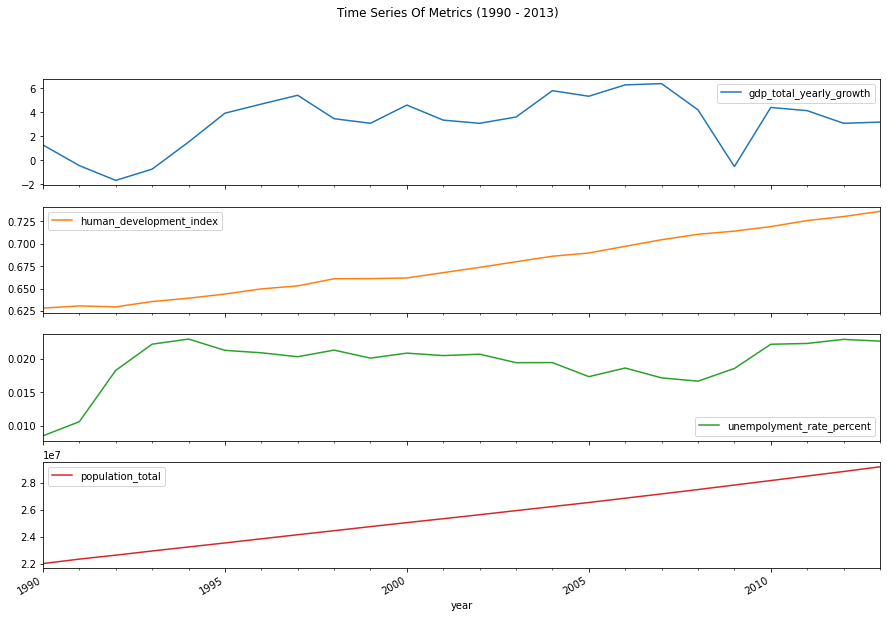

In [7]:
df_grouped_by_year.plot(figsize=(15,10),subplots=True,
                       title='Time Series Of Metrics (1990 - 2013)');

> Incremental trends

. Human Development Index (HDI)

. Total Population

> There is a frequent steady in the Employment Rate could be explained by the constant increase in Total population.
This requires further investigation.

> The fluctuations in the GDP yearly growth likely stem from absence of data for the GDP yearly metric.

### Lets investigate country-Human Development Index. Which countries have the highest or lowest ever recorded (in range of years 1990 - 2013)?

In [9]:
# separate the bottom and top 20 countries by human development
top_20_human_development_2013 = df.groupby('country').max()['human_development_index'].sort_values(ascending = False)[:20]
bottom_20_human_development_2013 = df.groupby('country').max()['human_development_index'].sort_values(ascending = True)[:20]

# select color palette
pal_top = sns.color_palette("Greens_r", len(top_20_human_development_2013))
pal_bottom = sns.color_palette("Reds_r", len(bottom_20_human_development_2013))


# define function to rank the percentage values
def rankmin(x):
    u, inv, counts = np.unique(x, return_inverse=True, return_counts=True)
    csum = np.zeros_like(counts)
    csum[1:] = counts[:-1].cumsum()
    return csum[inv]

# calculate the rank for each percentage value
rank = rankmin(bottom_20_human_development_2013)

ticks = np.arange(0, 100 + 20, 20)

C:\Users\Ons\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ons\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


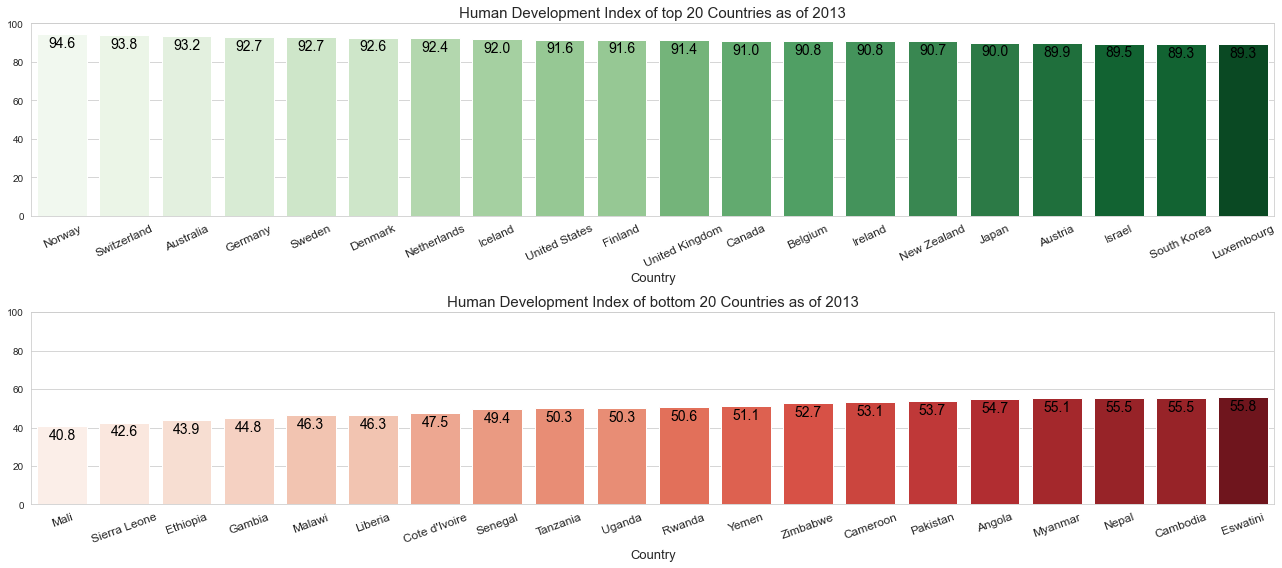

In [15]:
# plot
plt.figure(figsize = (18, 8))
sns.set_style("whitegrid")

#=========================================plot for top 20 countries========================================================

plt.subplot(2, 1, 1)
splot = sns.barplot(top_20_human_development_2013.index, top_20_human_development_2013.values*100, 
                    palette=np.array(pal_top[::-1])[rank])


# annotate the bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -9), textcoords = 'offset points', color = 'black',
                  fontsize = 14)


# labeling
plt.title('Human Development Index of top 20 Countries as of 2013', fontsize = 15)
plt.xlabel('Country', fontsize = 13)
plt.xticks(rotation = 25, fontsize = 12)
plt.yticks(ticks, ticks)

#======================================plot for bottom 20 countries========================================================
plt.subplot(2, 1, 2)
splot = sns.barplot(bottom_20_human_development_2013.index, bottom_20_human_development_2013.values*100, 
                    palette=np.array(pal_bottom[::-1])[rank])


# annotate the bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -9), textcoords = 'offset points', color = 'black',
                   fontsize = 14)
    

#labeling 
plt.title('Human Development Index of bottom 20 Countries as of 2013', fontsize = 15)
plt.xlabel('Country', fontsize = 13)
plt.xticks(rotation = 20, fontsize = 12)
plt.yticks(ticks, ticks)

plt.tight_layout()

> Its easy to see Norway, Switzerland, and Australia share the highest human development rate ever recorded (range: 1990 - 2013) while countries like Gambia, Ethiopia Sierra Leone, and Mali lie at the bottom end of the spectrum.

### Lets explore the relationship between Human Development Index correlate with GDP Growth in Years?

In [18]:
df1 = df.groupby(['country','year']).min().query('year == 2013')
df1.head()

,,gdp_total_yearly_growth,human_development_index,unempolyment_rate_percent,population_total
country,year,,,,
Albania,2013-01-01,2.06,0.781,0.05530,2900000
Algeria,2013-01-01,2.99,0.746,NaN,38100000
Angola,2013-01-01,3.79,0.547,NaN,26000000
Argentina,2013-01-01,3.98,0.824,0.00798,42200000
Armenia,2013-01-01,3.27,0.743,NaN,2900000


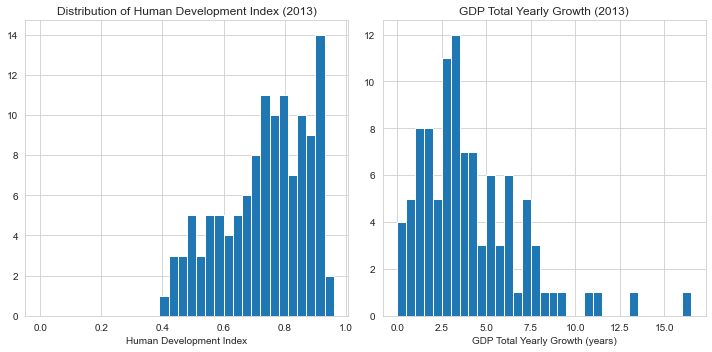

In [36]:
plt.figure(figsize = (10, 5))

bins = np.arange(0, df1.human_development_index.max() + 0.03, 0.03)
plt.subplot(1, 2, 1)
plt.hist(data = df1, x = 'human_development_index', bins = bins)
plt.title('Distribution of Human Development Index (2013)', fontsize = 12)
plt.xlabel('Human Development Index', fontsize = 10)

bins = np.arange(0, df1.gdp_total_yearly_growth.max() + 0.5, 0.5)
plt.subplot(1, 2, 2)
plt.hist(data = df1, x = 'gdp_total_yearly_growth', bins = bins)
plt.title('GDP Total Yearly Growth (2013)', fontsize = 12)
plt.xlabel('GDP Total Yearly Growth (years)', fontsize = 10)
plt.tight_layout();

> Both distributions seem to be generally bimodal.

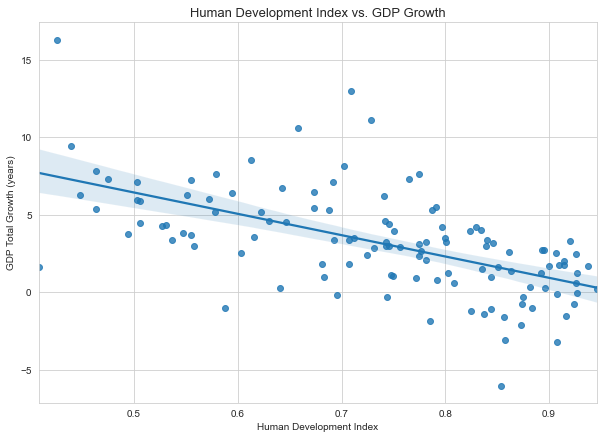

In [37]:
plt.figure(figsize = (10, 7))
sns.regplot(data = df1, x = 'human_development_index', y = 'gdp_total_yearly_growth', fit_reg = True);

plt.title('Human Development Index vs. GDP Growth', fontsize = 13)
plt.xlabel('Human Development Index', fontsize = 10)
plt.ylabel('GDP Total Growth (years)', fontsize = 10);

In [38]:
df1[['gdp_total_yearly_growth', 'human_development_index']].corr()

,gdp_total_yearly_growth,human_development_index
gdp_total_yearly_growth,1.000000,-0.585793
human_development_index,-0.585793,1.000000


> The HDI has three dimensions: health, education and living standard. It looks to be a bad predictor for GDP growth.

> As it appears there are a negative correlation

### Limitations:
<ul>
<li>Since there was missing data for the Unemployment Rate, we cannot be deterministic about ranking the top or bottom 20 countries. There may be other countries left out of consideration on account of missing data.</li>

<li>Except for the time series, the analysis here focuses on a single year - 2013 to examine the relationship between different metrics. A certain correlation found may not exist for a different year or vice versa.</li>
    
<li>Regarding the time series: it has been examined for years in the range 1990 - 2013. Certain metrics may show interesting nuances in years prior to this range. However, since data was ubiquitously avaliable only through the years 1990 - 2013, this range has been the primary focus of the analysis.</li>
    </ul>

In [116]:
df2 = df.drop(columns=['gdp_total_yearly_growth',
                      'unempolyment_rate_percent',
                      'human_development_index'],
                             axis='columns').groupby(['country', 'population_total']).max().query('year == 2013').sort_values('population_total', ascending=False)
df2.head(5)

,,year
country,population_total,
United States,316000000,2013-01-01
Indonesia,252000000,2013-01-01
Pakistan,191000000,2013-01-01
Bangladesh,153000000,2013-01-01
Russia,144000000,2013-01-01


> As we exploring our data for the year 2013, we can see maximun five countries which have highest population.

# Conclusions:

#### Certain metrics like GDP Per Capita, Human Development Index and Population show a consistently increasing trend.

#### There is a frequent steady in the Employment Rate could be explained by the constant increase in Total population.

#### The HDI has three dimensions: health, education and living standard. It looks to be a bad predictor for GDP growth. As it appears there is a negative correlation.

#### Its easy to see Norway, Switzerland, and Australia share the highest human development rate ever recorded (range: 1990 - 2013) while countries like Gambia, Ethiopia Sierra Leone, and Mali lie at the bottom end of the spectrum.
